# Visualização de dados financeiros

Bibliotecas utilizadas

In [139]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
import numpy as np 
import pandas as pd

In [174]:
plt.style.use('bmh')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '12'
plt.rcParams['axes.grid'] = False

Lista de cores disponíveis no pacote `matplotlib`:
![cores matplotlib](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003.png)

## Conjunto de dados unidimensionais

In [3]:
np.random.seed(1000)

In [4]:
y = np.random.standard_normal(20)
x = np.arange(len(y))

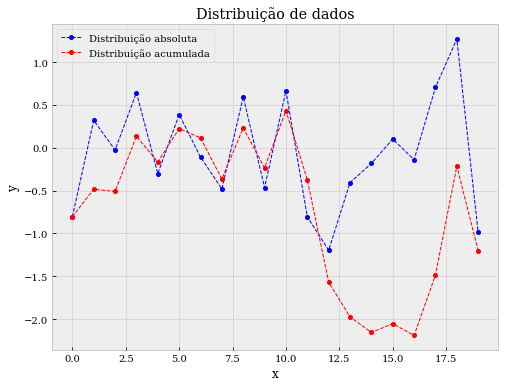

In [24]:
plt.subplots(figsize=(8,6))
plt.plot(x,y, 'bo--', label='Distribuição absoluta', linewidth=1, markersize=4)
plt.plot(y.cumsum(), 'ro--', label='Distribuição acumulada', linewidth=1, markersize=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribuição de dados')
plt.legend()
plt.show()

## Conjunto de dados bidimensionais

In [25]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

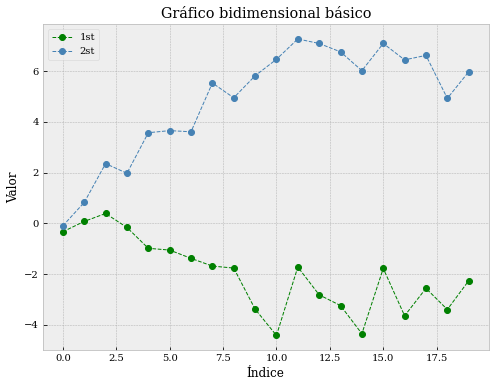

In [68]:
plt.figure(figsize=(8,6))
plt.plot(y[:, 0], c='g', marker='o', ls='--', lw=1, label='1st')
plt.plot(y[:, 1], c='steelblue', marker='o', ls='--', lw=1, label='2st')
plt.ylabel('Valor')
plt.xlabel('Índice')
plt.title('Gráfico bidimensional básico')
plt.legend(loc='upper left')
plt.show()

## Subplots

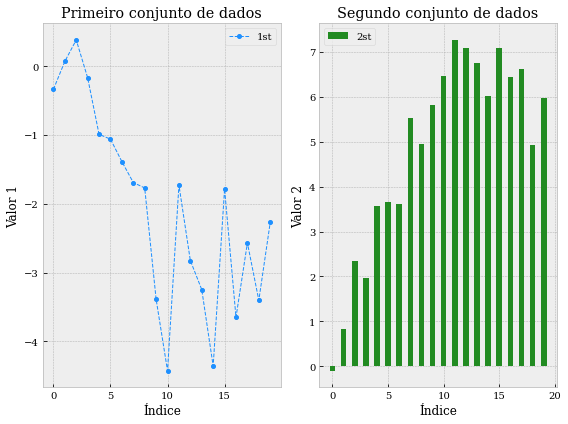

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].plot(y[:, 0], 'o--', color='dodgerblue', lw=1, ms=4, label='1st')
ax[0].legend()
ax[0].set_xlabel('Índice')
ax[0].set_ylabel('Valor 1')
ax[0].set_title('Primeiro conjunto de dados')

ax[1].bar(np.arange(len(y)), y[:, 1], color='forestgreen', width=.5, label='2st')
ax[1].set_axisbelow(True)
ax[1].legend(loc=2)
ax[1].set_xlabel('Índice')
ax[1].set_ylabel('Valor 2')
ax[1].set_title('Segundo conjunto de dados')
plt.tight_layout()

plt.show()

### Gráficos de Dispersão (_Scatter plots_)

In [94]:
y = np.random.standard_normal((1000, 2))
c = np.random.randint(0, 10, len(y))

Escolhendo colormaps em Matplotlib:

![Sequential](https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_003.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_005.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png)

![](https://matplotlib.org/stable/_images/sphx_glr_colormaps_007.png)

Fonte: https://matplotlib.org/stable/tutorials/colors/colormaps.html

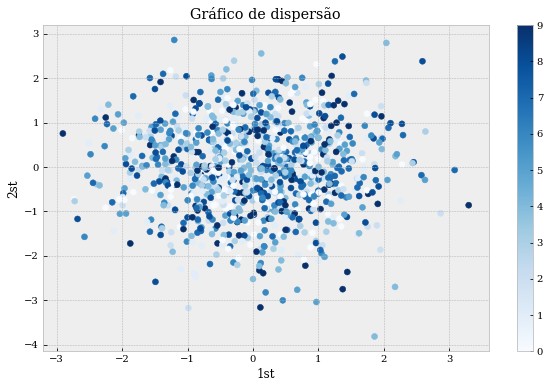

In [109]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=c, cmap='Blues', marker='o')
plt.grid(True)
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2st')
plt.title('Gráfico de dispersão')
plt.show()

### Histogramas

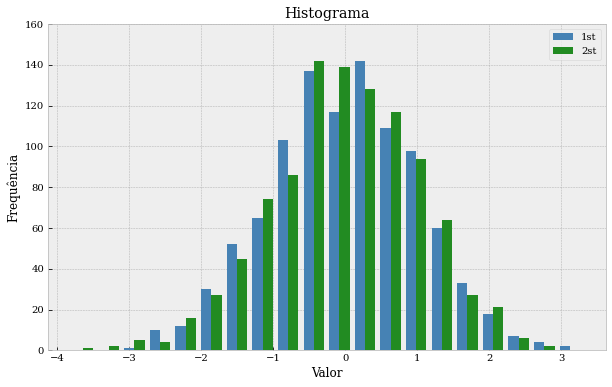

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(y, label=['1st', '2st'], color=['steelblue', 'forestgreen'], bins=20)
ax.set_axisbelow(True)
plt.legend(loc=0)
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.grid(True)
plt.ylim(0, 160)
plt.show()

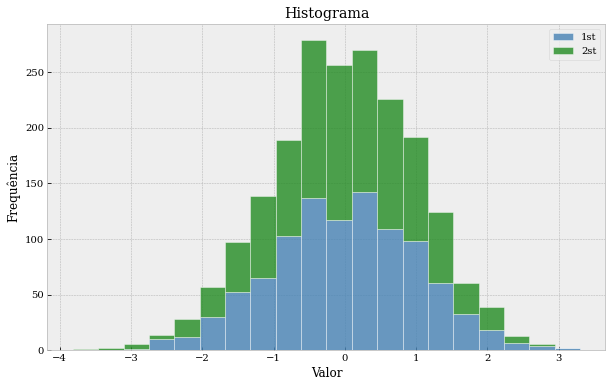

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(y, label=['1st', '2st'], color=['steelblue', 'forestgreen'], 
        edgecolor='white', stacked=True, bins=20, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlabel('Valor')
ax.set_ylabel('Frequência')
ax.set_title('Histograma')
plt.legend(loc=0)
plt.grid(True)
plt.show()


### Gráfico de caixas (_Boxplots_)

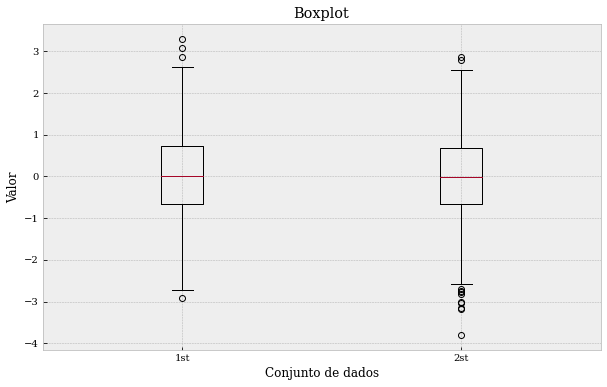

In [136]:
fig, ax = plt.subplots(figsize=(10,6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2st'])
plt.xlabel('Conjunto de dados')
plt.ylabel('Valor')
plt.title('Boxplot')
plt.grid(True)
plt.show()

## `matplotlib` e LaTeX

In [137]:
def func(x):
    return 0.5 * np.exp(x) + 1

In [138]:
a, b = 0.5, 1.5
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a,b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

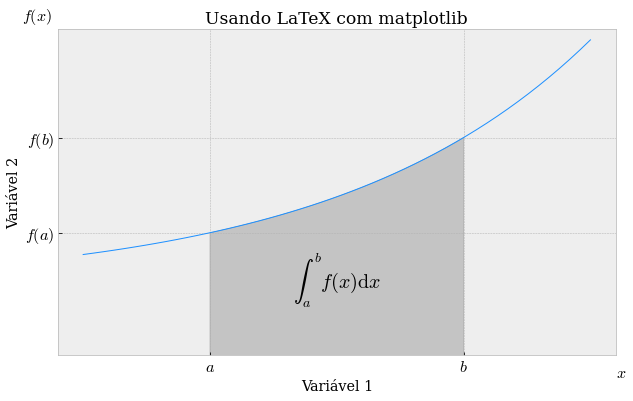

In [178]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, color='dodgerblue', linewidth=1)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5', alpha=.7)
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x) \mathrm{d}x$', horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$', fontsize=16)
plt.figtext(0.075, 0.9, '$f(x)$', fontsize=16)
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'), fontsize=16)
ax.set_yticks((func(a), func(b)))
ax.set_yticklabels(('$f(a)$', '$f(b)$'), fontsize=16)
ax.set_xlabel(r'Variável 1')
ax.set_ylabel(r'Variável 2')
ax.set_title("Usando LaTeX com matplotlib")
plt.grid(True)